In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

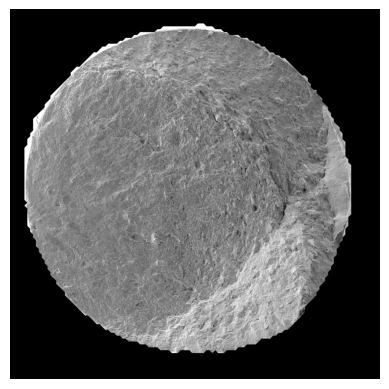

In [30]:
# Read the image after the slise of the bottom bar and after 
# brings out the contour with black pixels in the background
img = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\cropped\\cropped\\P1MF1_C.png',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, width = gray.shape
plt.axis('off')
plt.imshow(img)
plt.show()


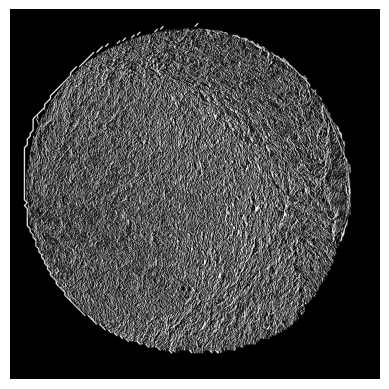

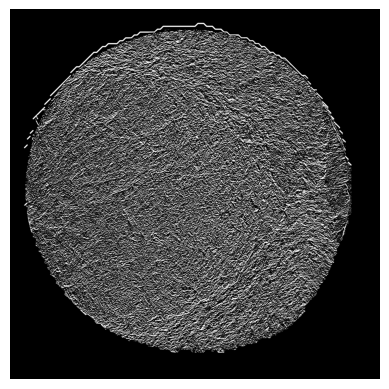

In [31]:
# Convert the out image to RGB
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Two dimensional Sobel filter

img_RGB = img_color.copy()
# Convert to grayscale
img_grey = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)


# Apply Gaussian blur
img_gauss = cv2.GaussianBlur(img_grey, (13,13), 0)

# Run Sobel filter on the original image
sobelx = cv2.Sobel(img_gauss, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gauss, cv2.CV_8U, 0, 1, ksize=5)

# Save the image
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\sobelx.jpg', sobelx)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\sobely.jpg', sobely)

plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(sobely, cmap='gray')
plt.axis('off')
plt.show()

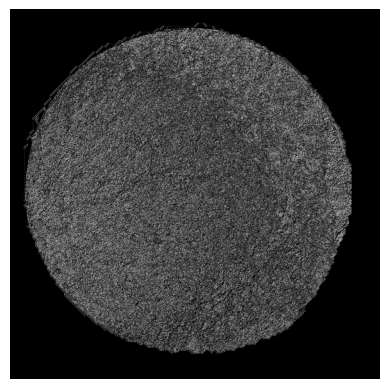

In [32]:
# Find the magnitude of the gradient
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize the image
sobel_magnitude = sobel_magnitude/sobel_magnitude.max()*255

# Convert to uint8
sobel_magnitude = np.uint8(sobel_magnitude)

# Save the image
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\sobel_magnitude.jpg', sobel_magnitude)

plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')
plt.show()

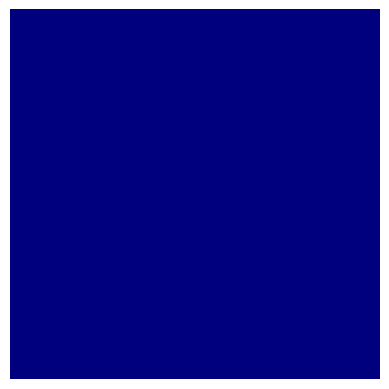

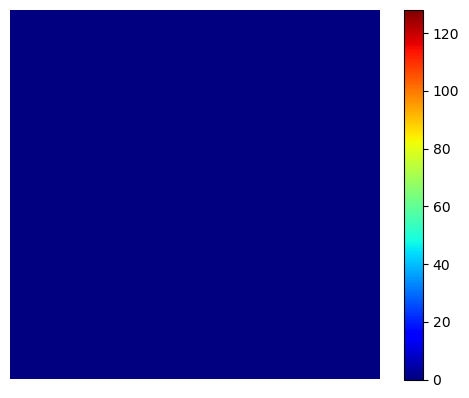

In [28]:
# Sliding window over sobel image in two dimensions to create a heatmap of the edges

window_size = 201 # Odd number only
window_step = 10

heat_map_sobel = np.zeros(sobel_magnitude.shape, dtype=np.uint8)

# pad the images with zeros


sobel_c = np.pad(sobel_magnitude, int((window_size-1)/2), mode='constant', constant_values=0)
mask_metal_c = np.pad(mask_metal, int((window_size-1)/2), mode='constant', constant_values=0)



for y in range(0, sobel_c.shape[0], window_step):
    for x in range(0, sobel_c.shape[1], window_step):
        window = sobel_c[y:y+window_size, x:x+window_size]
        mask_metal_window = mask_metal_c[y:y+window_size, x:x+window_size]/255
        if mask_metal_window.sum() == 0 or mask_metal_window[(int((window_size - 1) / 2)), (int((window_size - 1) / 2))] == 0:
            heat_map_sobel[y:y+window_size, x:x+window_size] = 0
        else:
            heat_map_sobel[y:y+window_step, x:x+window_step] = np.sum(window)/mask_metal_window.sum()

heat_map_sobel = cv2.equalizeHist(heat_map_sobel)

# Save the image with color map
heat_map_sobel_tmp = heat_map_sobel.copy()
heat_map_color_sobel = cv2.applyColorMap(heat_map_sobel_tmp, cv2.COLORMAP_JET)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel.jpg', heat_map_color_sobel)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel_gray.jpg', heat_map_sobel_tmp)

heat_map_color_sobel_rgb = cv2.cvtColor(heat_map_color_sobel, cv2.COLOR_BGR2RGB)

plt.imshow(heat_map_color_sobel_rgb, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

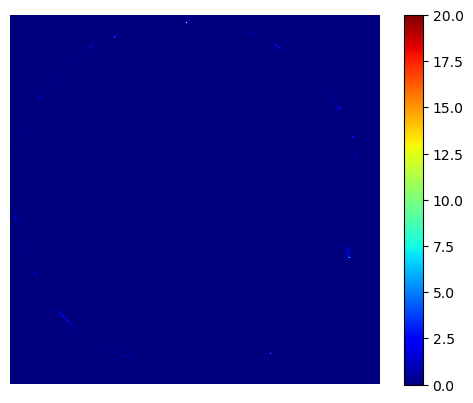

In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image after the slice of the bottom bar and after
# brings out the contour with black pixels in the background
img = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\cropped\\cropped\\P1MF1_C.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Assuming the image already contains the contour with black pixels in the background
# If the image is preprocessed by UNet and already has the contour, you don't need to obtain it separately.
contour_img = gray  # Use the grayscale image directly

# Convert the out image to RGB
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Two-dimensional Sobel filter
img_RGB = img_color.copy()
img_grey = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
img_gauss = cv2.GaussianBlur(img_grey, (13, 13), 0)

# Apply Sobel filter to the masked image
img_gauss_contour = cv2.bitwise_and(img_gauss, img_gauss, mask=contour_img)
sobelx = cv2.Sobel(img_gauss_contour, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gauss_contour, cv2.CV_8U, 0, 1, ksize=5)
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize the image
sobel_magnitude = sobel_magnitude / sobel_magnitude.max() * 255
sobel_magnitude = np.uint8(sobel_magnitude)

# Sliding window over sobel image in two dimensions to create a heatmap of the edges
window_size = 201  # Odd number only
window_step = 10

heat_map_sobel = np.zeros(sobel_magnitude.shape, dtype=np.uint8)

# Pad the images with zeros
sobel_c = np.pad(sobel_magnitude, int((window_size - 1) / 2), mode='constant', constant_values=0)
contour_img_c = np.pad(contour_img, int((window_size - 1) / 2), mode='constant', constant_values=0)

for y in range(0, sobel_c.shape[0], window_step):
    for x in range(0, sobel_c.shape[1], window_step):
        window = sobel_c[y:y + window_size, x:x + window_size]
        contour_img_window = contour_img_c[y:y + window_size, x:x + window_size]
        if contour_img_window.sum() == 0:
            heat_map_sobel[y:y + window_size, x:x + window_size] = 0
        else:
            heat_map_sobel[y:y + window_step, x:x + window_step] = np.sum(window) / contour_img_window.sum()

# Display and save the heatmap
plt.imshow(heat_map_sobel, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()



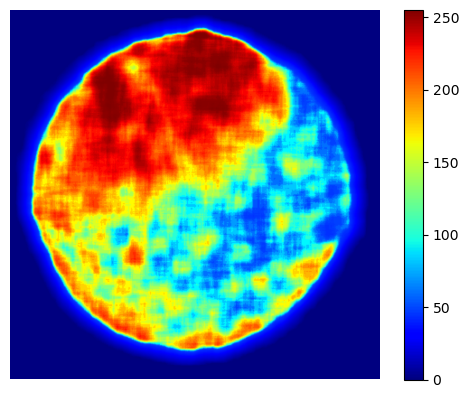

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the 'clean_image' from your Unet model
clean_image = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\cropped\\cropped\\P1MF2_C.png', cv2.IMREAD_GRAYSCALE)

# Convert the 'clean_image' to RGB
img_color = cv2.cvtColor(clean_image, cv2.COLOR_GRAY2RGB)

# Two-dimensional Sobel filter
img_grey = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img_grey, (13, 13), 0)
sobelx = cv2.Sobel(img_gauss, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gauss, cv2.CV_8U, 0, 1, ksize=5)

# Find the magnitude of the gradient
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize the image
sobel_magnitude = sobel_magnitude / sobel_magnitude.max() * 255

# Convert to uint8
sobel_magnitude = np.uint8(sobel_magnitude)

# Sliding window over the Sobel image to create a heatmap of the edges
window_size = 201  # Odd number only
window_step = 10

heat_map_sobel = np.zeros(sobel_magnitude.shape, dtype=np.uint8)

# Pad the images with zeros
sobel_c = np.pad(sobel_magnitude, int((window_size - 1) / 2), mode='constant', constant_values=0)

for y in range(0, sobel_c.shape[0], window_step):
    for x in range(0, sobel_c.shape[1], window_step):
        window = sobel_c[y:y + window_size, x:x + window_size]
        if window.sum() == 0:
            heat_map_sobel[y:y + window_size, x:x + window_size] = 0
        else:
            heat_map_sobel[y:y + window_step, x:x + window_step] = np.sum(window) / window.size

# Normalize the heatmap using histogram equalization
heat_map_sobel = cv2.equalizeHist(heat_map_sobel)

# Save the image with color map
heat_map_sobel_tmp = heat_map_sobel.copy()
heat_map_color_sobel = cv2.applyColorMap(heat_map_sobel_tmp, cv2.COLORMAP_JET)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel.jpg', heat_map_color_sobel)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel_gray.jpg', heat_map_sobel_tmp)

heat_map_color_sobel_rgb = cv2.cvtColor(heat_map_color_sobel, cv2.COLOR_BGR2RGB)

plt.imshow(heat_map_color_sobel_rgb, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()


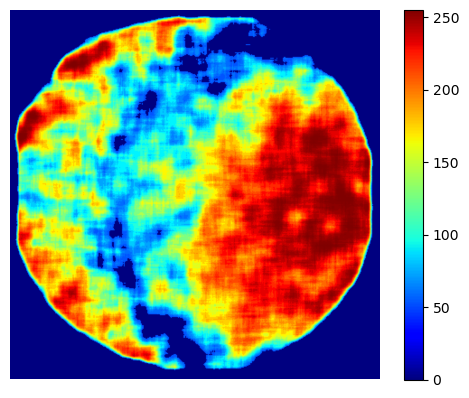

In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the 'clean_image' from your Unet model
clean_image = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\cropped\\cropped\\P1MF7_N.png', cv2.IMREAD_GRAYSCALE)

# Convert the 'clean_image' to RGB
img_color = cv2.cvtColor(clean_image, cv2.COLOR_GRAY2RGB)

# Two-dimensional Sobel filter
img_grey = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img_grey, (13, 13), 0)
sobelx = cv2.Sobel(img_gauss, cv2.CV_8U, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gauss, cv2.CV_8U, 0, 1, ksize=5)

# Find the magnitude of the gradient
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize the image
sobel_magnitude = sobel_magnitude / sobel_magnitude.max() * 255

# Convert to uint8
sobel_magnitude = np.uint8(sobel_magnitude)

# Sliding window over the Sobel image to create a heatmap of the edges
window_size = 201  # Odd number only
window_step = 10

heat_map_sobel = np.zeros(sobel_magnitude.shape, dtype=np.uint8)

# Pad the images with zeros
sobel_c = np.pad(sobel_magnitude, int((window_size - 1) / 2), mode='constant', constant_values=0)

for y in range(0, sobel_c.shape[0], window_step):
    for x in range(0, sobel_c.shape[1], window_step):
        window = sobel_c[y:y + window_size, x:x + window_size]
        if window.sum() == 0:
            heat_map_sobel[y:y + window_size, x:x + window_size] = 0
        else:
            heat_map_sobel[y:y + window_step, x:x + window_step] = np.sum(window) / window.size

# Normalize the heatmap using histogram equalization
heat_map_sobel = cv2.equalizeHist(heat_map_sobel)

# Apply a threshold to remove low-intensity values
threshold = 50
heat_map_sobel[heat_map_sobel < threshold] = 0

# Save the image with color map
heat_map_sobel_tmp = heat_map_sobel.copy()
heat_map_color_sobel = cv2.applyColorMap(heat_map_sobel_tmp, cv2.COLORMAP_JET)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel.jpg', heat_map_color_sobel)
cv2.imwrite('C:\\Users\\yoni mazin\\Downloads\\temp\\heat_map_sobel_gray.jpg', heat_map_sobel_tmp)

heat_map_color_sobel_rgb = cv2.cvtColor(heat_map_color_sobel, cv2.COLOR_BGR2RGB)

plt.imshow(heat_map_color_sobel_rgb, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()
